Fine acquisizione


<function matplotlib.pyplot.show>

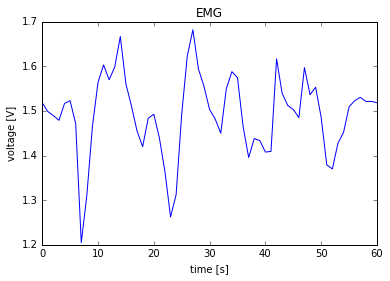

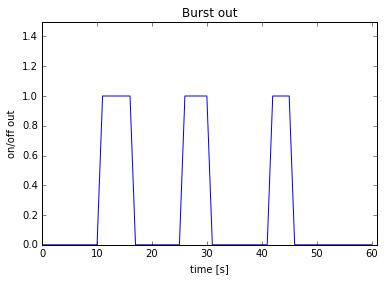

In [13]:
%matplotlib inline
from pynq.pmods import Grove_ADC , PMOD_IO 
import matplotlib.pyplot as plt
from pynq import Overlay
from pynq.board import LED , Button
import time
Overlay("pmod.bit").download()

def a_led():
    for i in range(MAX):
            led[i].on()
            time.sleep(0.05)
def s_led():
    for i in range(MAX):
            led[i].off()
            time.sleep(0.05)

MAX = 4
grove_adc = Grove_ADC(1, 4)
pmod_out=PMOD_IO(2,7,'out')
pmod_out.write(0)
bt = Button(0)
led = [LED(i)for i in range(MAX)]
for i in range(MAX):
    led[i].off()

while not bt.read():
    time.sleep(0.1)
while bt.read():
    a_led()
settato = 0
l = []
b = []
while not bt.read():
    a = grove_adc.read()
    b.append(a)
    if a < 1.5:
        settato = 0
    if (a > 1.6) or settato:
        settato = 1
        l.append(1)
        c=1
        while c<=4:
            pmod_out.write(c%2)
            c+=1
            time.sleep(0.025)
    else:
        l.append(0)
        pmod_out.write(0)
        time.sleep(0.1)
while bt.read():
    s_led()
print("Fine acquisizione")

plt.figure(1)
plt.title("EMG")
plt.xlabel("time [s]")
plt.ylabel("voltage [V]")
plt.plot(b)
plt.figure(2)
plt.title("Burst out")
plt.plot(l)
plt.xlabel("time [s]")
plt.ylabel("on/off out")
plt.axis([0.0,len(l),0.0,1.5])
plt.show


